Download the dataset from https://www.kaggle.com/tongpython/cat-and-dog

In [3]:
install keras

SyntaxError: invalid syntax (<ipython-input-3-393a2b210cf4>, line 1)

In [1]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'keras'

In [2]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="training_set/training_set",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test_set/test_set", target_size=(224,224))


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [4]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [7]:
hist = model.fit_generator(steps_per_epoch=5,generator=traindata, validation_data= testdata, validation_steps=5,epochs=10)

Epoch 1/10
5/5 [==============================] - 354s 71s/step - loss: 0.9784 - accuracy: 0.6062 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 356s 71s/step - loss: 0.8860 - accuracy: 0.5188 - val_loss: 0.6967 - val_accuracy: 0.5250
Epoch 3/10
5/5 [==============================] - 354s 71s/step - loss: 0.7113 - accuracy: 0.4500 - val_loss: 0.7585 - val_accuracy: 0.4812
Epoch 4/10
5/5 [==============================] - 356s 71s/step - loss: 0.7232 - accuracy: 0.4938 - val_loss: 1.3443 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 353s 71s/step - loss: 0.7545 - accuracy: 0.5688 - val_loss: 0.6943 - val_accuracy: 0.5500
Epoch 6/10
5/5 [==============================] - 351s 70s/step - loss: 0.6903 - accuracy: 0.5312 - val_loss: 0.7260 - val_accuracy: 0.4938
Epoch 7/10
5/5 [==============================] - 354s 71s/step - loss: 0.7024 - accuracy: 0.4500 - val_loss: 0.6919 - val_accuracy: 0.4750
Epoch 8/10
5/5 [====

In [9]:
model.save("vgg16_1.h5")

cat


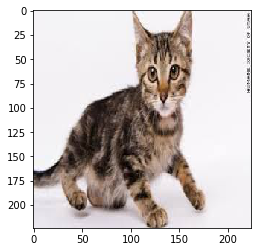

In [10]:
from keras.preprocessing import image
img = image.load_img("image.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')
